In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
# import report matrix
from sklearn.metrics import classification_report
import sklearn.model_selection as model_selection
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

xgb.XGBClassifier() is a boosting algorithm, specifically an implementation of the gradient boosting algorithm. It iteratively builds an ensemble of weak decision tree models by fitting the new model to the residuals (the difference between the predicted and actual values) of the previous model, thereby improving the overall prediction performance. In contrast, bagging (bootstrap aggregation) involves building an ensemble of models using bootstrap samples of the training data, and then averaging the predictions of these models to obtain the final prediction.

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# load the data into a Pandas DataFrame
data = pd.read_csv('body_level_classification_train.csv')

# convert Body Level to numeric values
data['Gender'] = pd.factorize(data['Gender'])[0]
data['Body_Level'] = pd.factorize(data['Body_Level'])[0]
# H_Cal_Consump
data['H_Cal_Consump'] = pd.factorize(data['H_Cal_Consump'])[0]
# Alcohol_Consump
data['Alcohol_Consump'] = pd.factorize(data['Alcohol_Consump'])[0]
# Smoking
data['Smoking'] = pd.factorize(data['Smoking'])[0]
# Food_Between_Meals
data['Food_Between_Meals'] = pd.factorize(data['Food_Between_Meals'])[0]
# Fam_Hist
data['Fam_Hist'] = pd.factorize(data['Fam_Hist'])[0]
# H_Col_Burn
data['H_Cal_Burn'] = pd.factorize(data['H_Cal_Burn'])[0]
# Tranport
data['Transport'] = pd.factorize(data['Transport'])[0]

# separate the features and target variable
X = data.drop('Body_Level', axis=1)
y = data['Body_Level']

## scaleing doesnot make any change in score
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# create an XGBoost classifier object
model = xgb.XGBClassifier()

# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

# print the mean and standard deviation of the scores
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


Accuracy: 0.97 (+/- 0.01)


In [ ]:
print(scores)

[0.96621622 0.95945946 0.98648649 0.97297297 0.96621622 0.96621622
 0.95945946 0.97278912 0.98639456 0.99319728]


In [33]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

# load the data into a Pandas DataFrame
data = pd.read_csv('body_level_classification_train.csv')
# to shaffle the data
data = data.sample(frac=1, random_state=42)

# data_cat=['Gender','H_Cal_Consump','Alcohol_Consump','Smoking','Food_Between_Meals','Fam_Hist','H_Cal_Burn','Transport','Body_Level']
# data_cat=data[data_cat]

# data_num = list(set(data.columns) - set(data_cat))
# data_num=data[data_num]

# le = LabelEncoder()
# df_encoded = data_cat.apply(le.fit_transform)

# data= pd.concat([data_num, df_encoded], axis=1)
# joblib.dump(le, 'label_encoder.joblib')
# data.head()
# create a LabelEncoder object
le = LabelEncoder()
# label-encode the column 'Body_Level'
data['Body_Level'] = le.fit_transform(data['Body_Level'])
# save the encoder to a file
joblib.dump(le, 'label_encoder.joblib')

# convert Body Level to numeric values
data['Gender'] = pd.factorize(data['Gender'])[0]
#data['Body_Level'] = pd.factorize(data['Body_Level'])[0]
# H_Cal_Consump
data['H_Cal_Consump'] = pd.factorize(data['H_Cal_Consump'])[0]
# Alcohol_Consump
data['Alcohol_Consump'] = pd.factorize(data['Alcohol_Consump'])[0]
# Smoking
data['Smoking'] = pd.factorize(data['Smoking'])[0]
# Food_Between_Meals
data['Food_Between_Meals'] = pd.factorize(data['Food_Between_Meals'])[0]
# Fam_Hist
data['Fam_Hist'] = pd.factorize(data['Fam_Hist'])[0]
# H_Col_Burn
data['H_Cal_Burn'] = pd.factorize(data['H_Cal_Burn'])[0]
# Tranport
data['Transport'] = pd.factorize(data['Transport'])[0]

#separate the features and target variable


In [34]:
X = data.drop('Body_Level', axis=1)
y = data['Body_Level']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
import joblib

# Train the model
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', class_weight='balanced')
model.fit(X, y)

# Save the model to a file
joblib.dump(model, 'lgbm_model.pkl')

['lgbm_model.pkl']

In [25]:
print(le.inverse_transform(y))

['Body Level 1' 'Body Level 1' 'Body Level 1' ... 'Body Level 4'
 'Body Level 4' 'Body Level 4']


In [36]:
# Load the saved model from file
loaded_model = joblib.load('/content/drive/MyDrive/master_ml/lgbm_model.pkl')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X)
f1_scores=f1_score(y, y_pred, average='weighted')
accurcy_scores=accuracy_score(y, y_pred)
print(f"weighted F1 score {f1_scores:.5f} ")
print(f"Accuracy score {accurcy_scores:.5f} ")

weighted F1 score 1.00000 
Accuracy score 1.00000 


In [ ]:
le = joblib.load('/content/drive/MyDrive/master_ml/label_encoder.joblib')
print(le.inverse_transform(y_pred))

['Body Level 1' 'Body Level 1' 'Body Level 1' ... 'Body Level 4'
 'Body Level 4' 'Body Level 4']


In [12]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# read test data and perform inference
data=pd.read_csv('/content/drive/MyDrive/master_ml/test.csv')
# drop Body_Level column if exists
if 'Body_Level' in data.columns:
    data=data.drop('Body_Level',axis=1)

data.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile


In [ ]:
f1_scores=f1_score(y, y_pred, average='weighted')
accurcy_scores=accuracy_score(y, y_pred)
print(f"weighted F1 score {f1_scores:.5f} ")
print(f"Accuracy score {accurcy_scores:.5f} ")

weighted F1 score 1.00000 
Accuracy score 1.00000 


In [8]:
y_pred = le.inverse_transform(y_pred)
print(y_pred)

['Body Level 3' 'Body Level 1' 'Body Level 1' ... 'Body Level 4'
 'Body Level 4' 'Body Level 3']


In [ ]:
with open('predictions.txt', 'w') as f:
    for item in y_pred:
        f.write("%s\n" % item)

In [ ]:
## scaleing doesnot make any change in score
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# create an XGBoost classifier object
model = lgb.LGBMClassifier(boosting_type='gbdt')

# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

# print the mean and standard deviation of the scores
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


Accuracy: 0.98 (+/- 0.01)


Try To apply SMOTE

3    680
2    406
1    201
0    190
Name: Body_Level, dtype: int64


<BarContainer object of 4 artists>

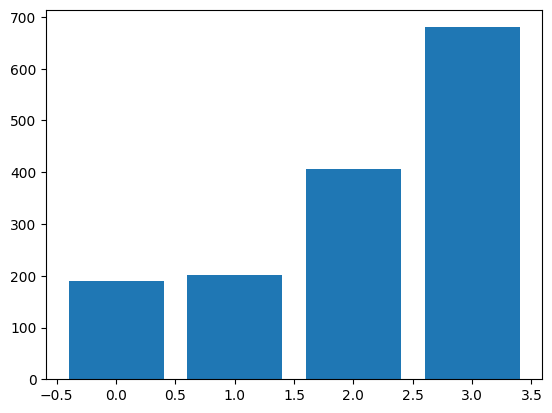

In [ ]:
# draw body level distribution
body_level_count= data['Body_Level'].value_counts()
print(body_level_count)
plt.bar(body_level_count.index, body_level_count.values)

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

0    680
1    680
2    680
3    680
Name: Body_Level, dtype: int64


<BarContainer object of 4 artists>

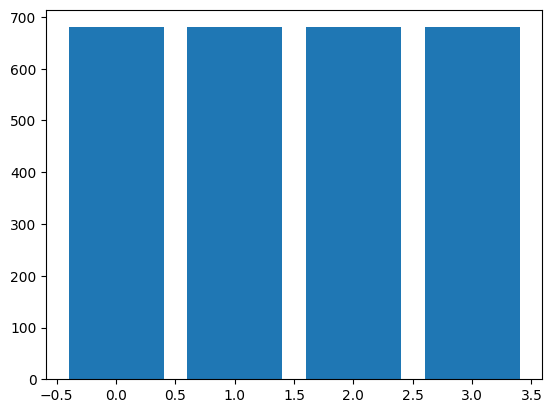

In [ ]:
body_level_count= y_res.value_counts()
print(body_level_count)
plt.bar(body_level_count.index, body_level_count.values)

In [ ]:
model = lgb.LGBMClassifier(boosting_type='gbdt')

# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model,X_res, y_res, cv=kf)

# print the mean and standard deviation of the scores
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Accuracy: 0.99 (+/- 0.01)


In [ ]:

# Set up k-fold cross-validation with 10 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Initialize an empty list to store the cross-validation scores
f1_scores = []
accurcy_score=[]

# Loop over each fold and train/test the Perceptron model
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Initialize the Perceptron model with any desired hyperparameters
    model = lgb.LGBMClassifier(boosting_type='gbdt',objective='multiclass')

    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    accurcy_score.append(accuracy_score(y_test, y_pred))
f1_scores=np.array(f1_scores)
accurcy_score=np.array(accurcy_score)
# Compute the average accuracy score over all folds
print(f"weighted F1 score {f1_scores.mean():.5f} (+/- {f1_scores.std():.5f})")
print(f"Accuracy score {accurcy_score.mean():.5f} (+/- {accurcy_score.std():.5f})")

weighted F1 score 1.00000 (+/- 0.00000)
Accuracy score 1.00000 (+/- 0.00000)


In [ ]:

# Set up k-fold cross-validation with 10 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Initialize an empty list to store the cross-validation scores
f1_scores = []
accurcy_score=[]

# Loop over each fold and train/test the Perceptron model
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    # Initialize the Perceptron model with any desired hyperparameters
    model = lgb.LGBMClassifier(boosting_type='gbdt',objective='multiclass',class_weight="balanced")

    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    accurcy_score.append(accuracy_score(y_test, y_pred))
    print("Classifction report for weight_options=")
    print(classification_report(y_test, y_pred))
f1_scores=np.array(f1_scores)
accurcy_score=np.array(accurcy_score)
# Compute the average accuracy score over all folds
print(f"weighted F1 score {f1_scores.mean():.5f} (+/- {f1_scores.std():.5f})")
print(f"Accuracy score {accurcy_score.mean():.5f} (+/- {accurcy_score.std():.5f})")

Classifction report for weight_options=
              precision    recall  f1-score   support

Body Level 1       1.00      1.00      1.00        19
Body Level 2       1.00      1.00      1.00        21
Body Level 3       1.00      1.00      1.00        40
Body Level 4       1.00      1.00      1.00        68

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148

Classifction report for weight_options=
              precision    recall  f1-score   support

Body Level 1       1.00      1.00      1.00        19
Body Level 2       1.00      1.00      1.00        20
Body Level 3       1.00      1.00      1.00        41
Body Level 4       1.00      1.00      1.00        68

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148

Classifction report for weight_options=
          

In [ ]:
print(f1_scores)
print(accurcy_score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
model = lgb.LGBMClassifier(boosting_type='gbdt',class_weight="balanced")
train, test = model_selection.train_test_split(data, train_size=0.8,test_size=0.2, random_state=0)
# get X_train, X_test, y_train, y_test
X_train = train.drop(['Body_Level'], axis=1)
y_train = train['Body_Level']
X_test = test.drop(['Body_Level'], axis=1)
y_test = test['Body_Level']

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Classifction report for weight_options=")
print(classification_report(y_test, y_pred))

Classifction report for weight_options=
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.92      0.95      0.94        38
           2       1.00      0.96      0.98        69
           3       1.00      1.00      1.00       140

    accuracy                           0.98       296
   macro avg       0.97      0.98      0.97       296
weighted avg       0.98      0.98      0.98       296



In [ ]:
model = lgb.LGBMClassifier(boosting_type='gbdt',class_weight="balanced")
train, test = model_selection.train_test_split(data, train_size=0.8,test_size=0.2, random_state=0)
# get X_train, X_test, y_train, y_test
X_train = train.drop(['Body_Level'], axis=1)
y_train = train['Body_Level']
X_test = test.drop(['Body_Level'], axis=1)
y_test = test['Body_Level']

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Classifction report for weight_options=")
print(classification_report(y_test, y_pred))

Classifction report for weight_options=
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.87      0.92      0.89        37
           2       0.99      0.98      0.98        83
           3       1.00      1.00      1.00       138

    accuracy                           0.97       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.97      0.97      0.97       296



SMOTE not added improvement

---



## boosting_type
boosting_type parameter in lgb.LGBMClassifier specifies the type of gradient boosting to use in the LightGBM model. It can take on one of the following values:

gbdt: Gradient Boosting Decision Tree. This is the default and most commonly used type of gradient boosting, where trees are built in a serial manner, with each tree trying to correct the mistakes made by the previous tree.

dart: Dropout-based Adaptive Regularization Training. This type of boosting drops some trees during the training process to avoid overfitting, similar to dropout regularization used in neural networks.

goss: Gradient-based One-Side Sampling. This is a more memory-efficient boosting method that only uses a subset of the data to build each tree, by sampling instances that have large gradients.

In [ ]:
boosting_type_options = ['gbdt', 'dart', 'goss']
score = [0.0, 0.0, 0.0]
for i in range(len(boosting_type_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    model = lgb.LGBMClassifier(boosting_type=boosting_type_options[i])
    # create a KFold object
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    # save scores mean and std
    score[i] = f"{scores.mean():.3f} (+/- {scores.std():.3f})"
penalty_score = pd.DataFrame({'penalty_options': boosting_type_options, 'score': score})
penalty_score

,penalty_options,score
0,gbdt,0.978 (+/- 0.012)
1,dart,0.977 (+/- 0.011)
2,goss,0.980 (+/- 0.011)


It show that it is better not to drop any trees in training

### n_estimators
n_estimators parameter in lgb.LGBMClassifier specifies the number of boosting rounds or decision trees to build. Each boosting round builds a new tree to correct the mistakes of the previous rounds.

Increasing the number of estimators can help improve the model's performance, but it also increases the computation time. It is a hyperparameter that needs to be tuned based on the size of the data and the complexity of the problem.

The optimal value of n_estimators depends on various factors, such as the learning rate, the number of training examples, the complexity of the problem, and the regularization applied to the model. Typically, a higher number of estimators improves the model's performance, but beyond a certain threshold, the performance plateaus, and the model may start overfitting the training data.

default=100

In [ ]:
n_estimators_options = [50,100,500,1000]
score = [0,0,0,0]
for i in range(len(n_estimators_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    model = lgb.LGBMClassifier(n_estimators=n_estimators_options[i])
    # create a KFold object
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    # save scores mean and std
    score[i] = f"{scores.mean():.3f} (+/- {scores.std():.3f})"
penalty_score = pd.DataFrame({'n_estimators_options': n_estimators_options, 'score': score})
penalty_score

,n_estimators_options,score
0,50,0.973 (+/- 0.013)
1,100,0.974 (+/- 0.013)
2,500,0.978 (+/- 0.014)
3,1000,0.977 (+/- 0.012)


increase boosting rounds more than 100 not improve the accuracy signficaltly

## learning_rate
The learning_rate parameter controls the step size at each iteration while moving toward a minimum of a loss function. In boosting algorithms, the learning rate determines the impact of each tree on the final prediction. A smaller learning rate makes the model more robust by adding more iterations and making the model converge more slowly. On the other hand, a larger learning rate leads to faster convergence, but the model might overfit to the training data

default=0.1

In [ ]:
learning_rate_options = [.01,0.1,1,5]
score = [0,0,0,0]
for i in range(len(learning_rate_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    model = lgb.LGBMClassifier(learning_rate=learning_rate_options[i])
    # create a KFold object
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    # save scores mean and std
    score[i] = f"{scores.mean():.3f} (+/- {scores.std():.3f})"
learning_rate = pd.DataFrame({'learning_rate': learning_rate_options, 'score': score})
learning_rate

,learning_rate,score
0,0.01,0.944 (+/- 0.023)
1,0.10,0.974 (+/- 0.013)
2,1.00,0.976 (+/- 0.011)
3,5.00,0.516 (+/- 0.097)


smaller learning rate than the default get lower score as it does not get enough steps to reach the minmum loss and higher learning_rate llet it to not converge to the global minmum  

## num_leaves

num_leaves is a hyperparameter that controls the number of leaves in a tree. A larger value of num_leaves can increase the capacity of the model to fit the training data, but can also lead to overfitting if the value is too large. Generally, the recommended value for num_leaves is lower than the total number of training samples.

Increasing the value of num_leaves can also increase the complexity and computational cost of the model. 

default=31

In [ ]:
num_leaves_options = [31,50,100,200]
score = [0,0,0,0]
for i in range(len(num_leaves_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    model = lgb.LGBMClassifier(num_leaves=num_leaves_options[i])
    # create a KFold object
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    # save scores mean and std
    score[i] = f"{scores.mean():.3f} (+/- {scores.std():.3f})"
num_leaves = pd.DataFrame({'num_leaves': num_leaves_options, 'score': score})
num_leaves

,num_leaves,score
0,31,0.974 (+/- 0.013)
1,50,0.977 (+/- 0.011)
2,100,0.977 (+/- 0.011)
3,200,0.977 (+/- 0.011)


Increase nuber of leaves over than 50 not affected the score

## max_depth

max_depth controls the maximum depth of a decision tree built during each boosting iteration. It determines how complex the tree can be and how much it can fit to the training data. A higher max_depth value allows the model to learn more complex interactions among the features in the training data, but may also lead to overfitting. On the other hand, a lower max_depth value limits the complexity of the model and may result in underfitting.

default=-1  (<=0 means no limit.)

In [ ]:
max_depth_options = [-1,10,100,1000]
score = [0,0,0,0]
for i in range(len(max_depth_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    model = lgb.LGBMClassifier(max_depth=max_depth_options[i],num_leaves=500)
    # create a KFold object
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    # save scores mean and std
    score[i] = f"{scores.mean():.3f} (+/- {scores.std():.3f})"
max_depth = pd.DataFrame({'max_depth': max_depth_options, 'score': score})
max_depth

,max_depth,score
0,-1,0.977 (+/- 0.011)
1,10,0.976 (+/- 0.012)
2,100,0.977 (+/- 0.011)
3,1000,0.977 (+/- 0.011)


set num_leaves to large number to let max_dpth be the stoping critiria 

## objective
 the objective parameter specifies the loss function to be optimized during training. The default value is 'binary', which corresponds to binary classification using the logistic loss function. Other supported values include:

'multiclass': for multi-class classification with softmax loss
'multiclassova': for multi-class classification with One-vs-All (OvA) loss
'regression': for regression problems using the mean squared error (MSE) loss function
'mae': for regression problems using the mean absolute error (MAE) loss function
There are also several other advanced objectives that can be used for specific problems or applications. The choice of objective function depends on the problem at hand and the type of output required.

In [ ]:
# create an instance of the Perceptron class with multi_class='ovr'
model = lgb.LGBMClassifier(objective='multiclass')
# create a KFold object
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)
# save scores mean and std
print(f"Score {scores.mean():.3f} (+/- {scores.std():.3f})")

Score 0.974 (+/- 0.013)


## class_weight

The class_weight parameter allows you to handle class imbalance in the dataset during training. Class imbalance occurs when one class has significantly fewer instances than the other class(es), which can lead to poor performance on the minority class(es) during training.

This parameter can take on different values, including:

None: The model treats all classes equally, which may result in poor performance if the classes are imbalanced.

balanced: The model automatically adjusts the weights inversely proportional to class frequencies in the input data. In other words, the weight of each class is set to be inversely proportional to the number of samples in that class. This helps to achieve balanced class weights during training.

Custom dictionary: You can also pass a custom dictionary to the class_weight parameter, where each class label is mapped to a weight value. For example, {0: 0.5, 1: 0.3, 2: 0.2} maps class label 0 to weight 0.5, class label 1 to weight 0.3, and class label 2 to weight 0.2. This allows you to manually adjust the class weights as per your requirement.

In [ ]:
class_weight_options = [None,'balanced']
score = [0,0]
for i in range(len(class_weight_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    model = lgb.LGBMClassifier(class_weight=class_weight_options[i],objective='multiclass')
    # create a KFold object
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    # save scores mean and std
    score[i] = f"{scores.mean():.3f} (+/- {scores.std():.3f})"
class_weight = pd.DataFrame({'class_weight': class_weight_options, 'score': score})
class_weight

,class_weight,score
0,None,0.974 (+/- 0.013)
1,balanced,0.976 (+/- 0.010)


## reg_alpha
reg_alpha is a regularization parameter that controls L1 regularization, which adds a penalty term to the objective function to prevent overfitting. It is used to control the amount of regularization applied to the model. The higher the value of reg_alpha, the higher the regularization applied, and the simpler the model. This parameter is used to reduce the impact of irrelevant features or noise in the data. A value of 0 means no regularization is applied. The default value is 0.0. Increasing the value of reg_alpha can also help in reducing the variance of the model, but it can increase the bias as well.

In [ ]:
reg_alpha_options = [0,0.01,0.1,0.5]
score = [0,0,0,0]
for i in range(len(reg_alpha_options)):
    model = lgb.LGBMClassifier(reg_alpha=reg_alpha_options[i],objective='multiclass',class_weight='balanced')
    # create a KFold object
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    # save scores mean and std
    score[i] = f"{scores.mean():.3f} (+/- {scores.std():.3f})"
reg_alpha = pd.DataFrame({'reg_alpha': reg_alpha_options, 'score': score})
reg_alpha

,reg_alpha,score
0,0.00,0.976 (+/- 0.010)
1,0.01,0.978 (+/- 0.014)
2,0.10,0.976 (+/- 0.013)
3,0.50,0.972 (+/- 0.012)


it is better to have no or small regularization as it is better to have low bias



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

# load the data into a Pandas DataFrame
data = pd.read_csv('body_level_classification_train.csv')

# convert Body Level to numeric values
data['Gender'] = pd.factorize(data['Gender'])[0]
data['Body_Level'] = pd.factorize(data['Body_Level'])[0]
# H_Cal_Consump
data['H_Cal_Consump'] = pd.factorize(data['H_Cal_Consump'])[0]
# Alcohol_Consump
data['Alcohol_Consump'] = pd.factorize(data['Alcohol_Consump'])[0]
# Smoking
data['Smoking'] = pd.factorize(data['Smoking'])[0]
# Food_Between_Meals
data['Food_Between_Meals'] = pd.factorize(data['Food_Between_Meals'])[0]
# Fam_Hist
data['Fam_Hist'] = pd.factorize(data['Fam_Hist'])[0]
# H_Col_Burn
data['H_Cal_Burn'] = pd.factorize(data['H_Cal_Burn'])[0]
# Tranport
data['Transport'] = pd.factorize(data['Transport'])[0]

# separate the features and target variable
X = data.drop('Body_Level', axis=1)
y = data['Body_Level']

## scaleing doesnot make any change in score
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# create an XGBoost classifier object
model = CatBoostClassifier()

# create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

# print the mean and standard deviation of the scores
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


In [ ]:
! pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00
